# Intro to Bayesian Statistics Lab

Complete the following set of exercises to solidify your knowledge of Bayesian statistics and Bayesian data analysis.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1. Cookie Problem

Suppose we have two bowls of cookies. Bowl 1 contains 30 vanilla cookies and 10 chocolate cookies. Bowl 2 contains 20 of each. You randomly pick one cookie out of one of the bowls, and it is vanilla. Use Bayes Theorem to calculate the probability that the vanilla cookie you picked came from Bowl 1?

In [3]:
bowls = [0.5, 0.5] # this will be my Priors, the probability of selecting each bowl
vanilla = [30/40, 20/40] # Likelihoods, the probability of selecting vanilla from each bowl

def bayes_theorem(priors: list, likelihoods: list) -> np.array: # each should be a list, returns an array
    marginal_prob = sum(np.multiply(priors, likelihoods))
    posterior_prob = np.divide(np.multiply(priors, likelihoods), marginal_prob)
    return posterior_prob

bayes_theorem(bowls, vanilla) # returns an array([0.6, 0.4]), so the first value is bowlOne, and second is bowlTwo

print("The Probability that the Vanilla cookie I selected was from bowl one is " + str(bayes_theorem(bowls, vanilla)[0]))

The Probability that the Vanilla cookie I selected was from bowl one is 0.6


What is the probability that it came from Bowl 2?

In [4]:
# the second item from my output
print("The Probability that the Vanilla cookie I selected was from bowl two is " + str(bayes_theorem(bowls, vanilla)[1]))

The Probability that the Vanilla cookie I selected was from bowl two is 0.4


What if the cookie you had picked was chocolate? What are the probabilities that the chocolate cookie came from Bowl 1 and Bowl 2 respectively?

In [18]:
chocolate = [1 - _ for _ in vanilla]

print("The Probability that the Chocolate cookie I selected was from bowl one is " + str(bayes_theorem(bowls, chocolate)[0]))

print("The Probability that the Chocolate cookie I selected was from bowl one is " + str(bayes_theorem(bowls, chocolate)[1]))

The Probability that the Chocolate cookie I selected was from bowl one is 0.3333333333333333
The Probability that the Chocolate cookie I selected was from bowl one is 0.6666666666666666


## 2. Candy Problem

Suppose you have two bags of candies:

- In Bag 1, the mix of colors is:
    - Brown - 30%
    - Yellow - 20%
    - Red - 20%
    - Green - 10%
    - Orange - 10%
    - Tan - 10%
    
- In Bag 2, the mix of colors is:
    - Blue - 24%
    - Green - 20%
    - Orange - 16%
    - Yellow - 14%
    - Red - 13%
    - Brown - 13%
    
Not knowing which bag is which, you randomly draw one candy from each bag. One is yellow and one is green. What is the probability that the yellow one came from the Bag 1?

*Hint: For the likelihoods, you will need to multiply the probabilities of drawing yellow from one bag and green from the other bag and vice versa.*

In [35]:
bag = [0.5, 0.5]
yellow = [0.2, 0.14]
green = [0.1, 0.2]

# first multiply P(yellow) * P(green), and then P(green) * P(yellow) ?
# or, prob(yellow GIVEN that a green was selected) and prob(green GIVEN that a yellow was selected) ?

def bayes_candy(priors: list, likelihoods: list) -> np.array: # each should be a list, returns an array
    marginal_prob = sum(np.multiply(priors, likelihoods))
    posterior_prob = np.divide(np.multiply(priors, likelihoods), marginal_prob)
    return posterior_prob

What is the probability that the yellow candy came from Bag 2?

In [36]:
# bayes_theorem(bag, yellow)[1]
bayes_theorem(bag, yellow)[1]

0.411764705882353

What are the probabilities that the green one came from Bag 1 and Bag 2 respectively?

In [22]:
bayes_theorem(bag, green)

array([0.33333333, 0.66666667])

## 3. Monty Hall Problem

Suppose you are a contestant on the popular game show *Let's Make a Deal*. The host of the show (Monty Hall) presents you with three doors - Door A, Door B, and Door C. He tells you that there is a sports car behind one of them and if you choose the correct one, you win the car!

You select Door A, but then Monty makes things a little more interesting. He opens Door B to reveal that there is no sports car behind it and asks you if you would like to stick with your choice of Door A or switch your choice to Door C. Given this new information, what are the probabilities of you winning the car if you stick with Door A versus if you switch to Door C?

In [39]:
doors = [1/3, 1/3, 1/3]
sports_car = [1/3, 1/3, 1/3]

bayes_theorem(doors, sports_car)[0]

0.3333333333333333

## 4. Bayesian Analysis 

Suppose you work for a landscaping company, and they want to advertise their service online. They create an ad and sit back waiting for the money to roll in. On the first day, the ad sends 100 visitors to the site and 14 of them sign up for landscaping services. Create a generative model to come up with the posterior distribution and produce a visualization of what the posterior distribution would look like given the observed data.

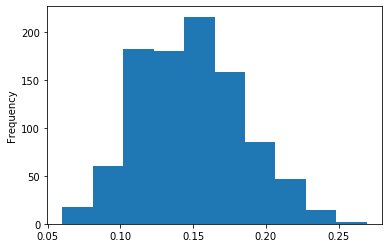

In [26]:
n = 100 # number of total observations
k = 14 # number of observations with Success

def posterior_dist(k, n, size = 100000): # add me to the Helper file too
    '''
    first: generate synthetic PRIORS using random uniform distribution, (probability of someone buying, a bunch of priors, these are the simulations of x% of people who visited the site bought something), so this might be something like [0.05, 0.5, 0.3, 0.8, etc.].
    second: generate synthetic LIKELIHOODS, a random percentage for each value in PRIORS, a binomial distribution, where PRIORS is a decimal (essentially a probabilty), and runs that in a binomial against n=50. np.random.binomial will return a "count" of successes, so we use a listcomp to build a list of the outcomes (which is really our Likelihoods we'll be using in Bayesian Inference) -- generated a simulated number of sales, based on a simulated PROB of sales.
    third: return a subset of our Series, pick all the simulated scenarios where we got 10 sales, that's what k equals, and we're saving the ones that match our distribution. so then we return a bunch of scenarios/probabilites that are likely to reproduce the OBSERVATION we have
    
    '''
    prior = pd.Series(np.random.uniform(0, 1, size = size))
    outcomes = [np.random.binomial(n, p) for p in prior]
    return prior[[x == k for x in outcomes]]

posterior_prob = posterior_dist(k, n)

posterior_prob.plot(kind = 'hist')

Produce a set of descriptive statistics for the posterior distribution.

In [24]:
posterior_prob.describe()

count    1029.000000
mean        0.147484
std         0.034641
min         0.055010
25%         0.121917
50%         0.145794
75%         0.170213
max         0.258754
dtype: float64

What is the 90% credible interval range?

In [27]:
from scipy.stats import sem, t

def conf_interval(sample, confidence):
    return t.interval(
        confidence, # confidence level, passed in as an argument
        len(sample) - 1, # degrees of freedom
        loc = sample.mean(),
        scale = sem(sample),
    )

conf_interval(posterior_prob, 0.9) # 90% confidence

(0.14683521600441143, 0.15061252942456424)

What is the Maximum Likelihood Estimate?

In [29]:
def mle(arr): #maximum likelihood estimate, pass in an array
    rounded = arr.round(2) # round each value in the array to 2 decimal values
    mode = rounded.mode()[0] # find the mode,
    prob = list(rounded).count(mode) / len(rounded) # and use the mode to calc a prob
    return mode, prob

mle(posterior_prob)[0] # returns a tuple, i just need item index zero

0.15